# 패키지 임포트

In [1]:
from C110_01_collecting_functions import *

import numpy
import pandas
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
%matplotlib inline
plt.rcParams['font.size'] = 20
plt.rcParams["figure.figsize"] = (50, 10)
plt.rcParams['lines.linewidth'] = 5
plt.rcParams["axes.grid"] = True

In [3]:
%%html
<style>
    table { display: inline-block }
    .rendered_html td, .rendered_html th { text-align: left; }
</style>

# 기상청 데이터 수집

In [4]:
# 기상청 사이트에 등록하고 부여받은 키를 설정합니다.
api_key = ''
start_date = '20210501'
finish_date = '20210531'
# 관측소 (서울: 108, 대구: 143)
list_stn_ids = [ 108,  143 ]

# 기상청 API 반응이 오래 걸리는 경우가 있어서, 여러차례 시도하도록 코딩함
df_kma = pandas.DataFrame()
for stn_id in list_stn_ids:
    try:
        df, total_count = get_ASOS(api_key, start_date, finish_date, stn_id)
    except:
        time.sleep(2)
        try:
            df, total_count = get_ASOS(api_key, start_date, finish_date, stn_id)
        except:
            time.sleep(2)
            try:
                df, total_count = get_ASOS(api_key, start_date, finish_date, stn_id)
            except:
                time.sleep(2)
                try:
                    df, total_count = get_ASOS(api_key, start_date, finish_date, stn_id)
                except:
                    pass
    line_logging('      >>', stn_id, 'Total:(', total_count, '), Pages:(', int(total_count / 10) + 1, ')', df.shape)
    if df.shape[0] > 0:
        df_kma = pandas.concat([df_kma, df], sort=False)
    if total_count > 10:
        page_count = int(total_count / 10) + 2
        for page_number in range(2, page_count):
            try:
                df, _ = get_ASOS(api_key, start_date, finish_date, stn_id, p_page_number=page_number)
            except:
                time.sleep(2)
                try:
                    df, _ = get_ASOS(api_key, start_date, finish_date, stn_id, p_page_number=page_number)
                except:
                    time.sleep(2)
                    try:
                        df, _ = get_ASOS(api_key, start_date, finish_date, stn_id, p_page_number=page_number)
                    except:
                        time.sleep(2)
                        try:
                            df, _ = get_ASOS(api_key, start_date, finish_date, stn_id, p_page_number=page_number)
                        except:
                            pass
            if df.shape[0] > 0:
                df_kma = pandas.concat([df_kma, df], sort=False)
            line_logging('      >>', stn_id, '(', page_number, '/', (page_count - 1), ')', df.shape)

display(df_kma)

[2022/01/03 00:14:37]:[get_ASOS is started. 20210501 20210531 108 1]
[2022/01/03 00:14:41]:[get_ASOS is finished. 20210501 20210531 108 1]
[2022/01/03 00:14:43]:[      >> 108 Total:( 31 ), Page:( 5 ) (10, 62)]
[2022/01/03 00:14:43]:[get_ASOS is started. 20210501 20210531 108 2]
[2022/01/03 00:15:50]:[get_ASOS is finished. 20210501 20210531 108 2]
[2022/01/03 00:15:52]:[      >> 108 ( 2 / 4 ) (10, 62)]
[2022/01/03 00:15:52]:[get_ASOS is started. 20210501 20210531 108 3]
[2022/01/03 00:17:24]:[get_ASOS is started. 20210501 20210531 108 3]
[2022/01/03 00:17:29]:[get_ASOS is started. 20210501 20210531 108 3]
[2022/01/03 00:18:41]:[get_ASOS is started. 20210501 20210531 108 3]
[2022/01/03 00:18:45]:[      >> 108 ( 3 / 4 ) (10, 62)]
[2022/01/03 00:18:45]:[get_ASOS is started. 20210501 20210531 108 4]
[2022/01/03 00:21:24]:[get_ASOS is started. 20210501 20210531 108 4]
[2022/01/03 00:22:22]:[get_ASOS is started. 20210501 20210531 108 4]
[2022/01/03 00:22:22]:[get_ASOS is finished. 20210501 20

,COL-01,COL-02,COL-03,COL-04,COL-05,COL-06,COL-07,COL-08,COL-09,COL-10,...,COL-53,COL-54,COL-55,COL-56,COL-57,COL-58,COL-59,COL-60,COL-61,COL-62
0,108,서울,2021-05-01,10.2,8.5,2326,15.3,1256,11.67,1.5,...,14.8,14.4,13.7,12.5,13.4,1.8,2.6,9.4,{박무}0320-{박무}{강도0}0600-0745. {비}0425-0550. {비}...,
1,108,서울,2021-05-02,12.4,7.3,602,18.7,1436,2.5,0.4,...,14.4,14.4,13.7,12.6,13.4,4.5,6.4,,-{비}-0230.,
2,108,서울,2021-05-03,14.1,8.4,555,20.3,1520,,,...,14.8,14.3,13.8,12.6,13.4,4.9,7.0,0.2,,
3,108,서울,2021-05-04,13.8,11.4,300,15.8,1915,16.25,1.5,...,15.3,14.4,13.8,12.7,13.4,1.0,1.4,19.5,{비}0630-{비}{강도0}0900-1040. {비}1155-{비}{강도0}120...,1.37
4,108,서울,2021-05-05,13.9,10.3,620,18.4,1509,0.5,0.1,...,15.0,14.4,13.9,12.7,13.4,4.7,6.7,,-{박무}-0020. -{비}-0030.,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,143,대구,2021-05-17,14.4,13.4,2317,16.0,1350,14.87,0.7,...,,,,,,1.0,1.5,,{안개비}0520-{안개비}{강도0}0600-{비}0720-0824. {박무}070...,
7,143,대구,2021-05-18,17.7,13.5,149,23.5,1707,1.33,0.1,...,,,,,,3.0,4.2,,{박무}0140-{박무}{강도0}0300-{박무}{강도0}0600-0650. {안개...,
8,143,대구,2021-05-19,22.5,15.8,19,29.4,1440,,,...,,,,,,5.1,7.2,,{박무}0230-{박무}{강도0}0300-0325. {박무}0540-{박무}{강도0...,
9,143,대구,2021-05-20,16.3,14.7,2317,20.0,1,13.67,2.0,...,,,,,,1.1,1.5,,{비}0750-0853. {비}0903-{비}{강도1}1200-1430. {박무}0...,


,108,143
datetime,,
2021-05-01,10.2,12.1
2021-05-02,12.4,13.6
2021-05-03,14.1,16.5
2021-05-04,13.8,17.0
2021-05-05,13.9,18.5
2021-05-06,15.7,16.9
2021-05-07,14.4,18.1
2021-05-08,14.3,18.1
2021-05-09,15.7,19.0


<AxesSubplot:xlabel='datetime'>

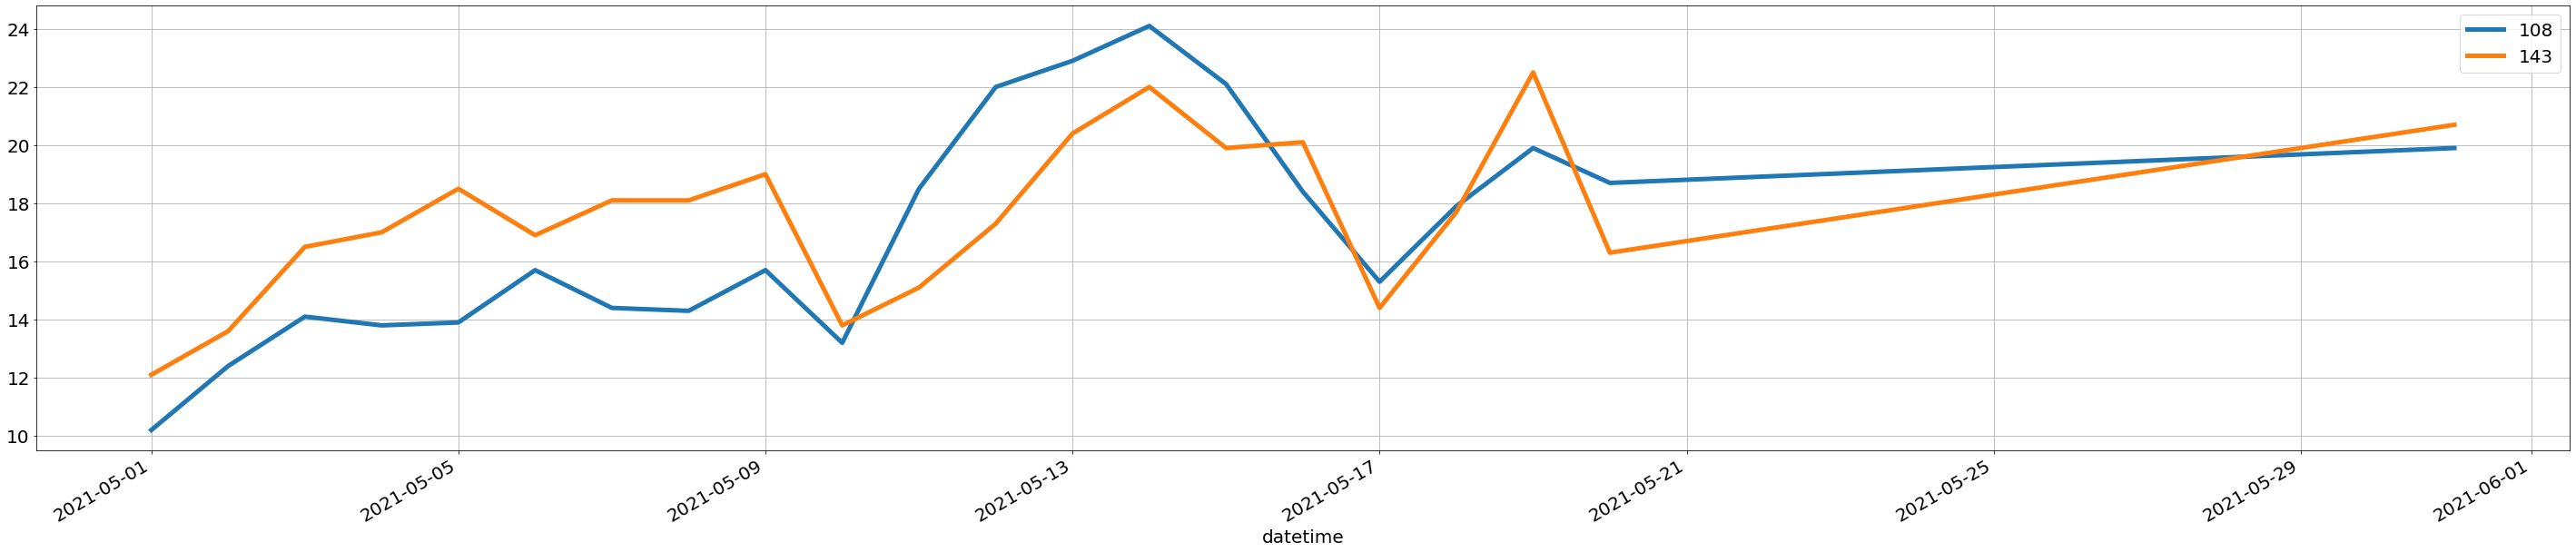

In [14]:
# COL-04[avgTa]: 평균기온
df = df_kma[['COL-01', 'COL-03', 'COL-04']]
df = df.drop_duplicates()
df['COL-04'] = df['COL-04'].astype(float)
df_pivot = pandas.pivot_table(df, values='COL-04', index=['COL-03'], columns=['COL-01'], aggfunc=numpy.sum, fill_value=0).reset_index()
df_pivot['datetime'] = pandas.to_datetime(df_pivot['COL-03'], format='%Y-%m-%d')
df_pivot = df_pivot.set_index(['datetime'])
# display(df_pivot)
df_plot = pandas.DataFrame(df_pivot.index)
df_plot['108'] = df_pivot['108'].tolist()
df_plot['143'] = df_pivot['143'].tolist()
df_plot = df_plot.set_index(['datetime'])
df_plot = df_plot.astype(float)
display(df_plot)
df_plot.plot()